In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Load a dataset

In [22]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=5 , validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8548 - loss: 0.4909 - val_accuracy: 0.9574 - val_loss: 0.1467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9557 - loss: 0.1518 - val_accuracy: 0.9677 - val_loss: 0.1101
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9675 - loss: 0.1102 - val_accuracy: 0.9740 - val_loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.0861 - val_accuracy: 0.9758 - val_loss: 0.0817
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0760 - val_accuracy: 0.9770 - val_loss: 0.0744


In [26]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9770 - loss: 0.0744


[0.07442173361778259, 0.9769999980926514]

<ipython-input-28-8edef9e1a5fa>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b-', label='Train Loss', c = "blue")
<ipython-input-28-8edef9e1a5fa>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'g-', label='Validation Loss' , c="red")


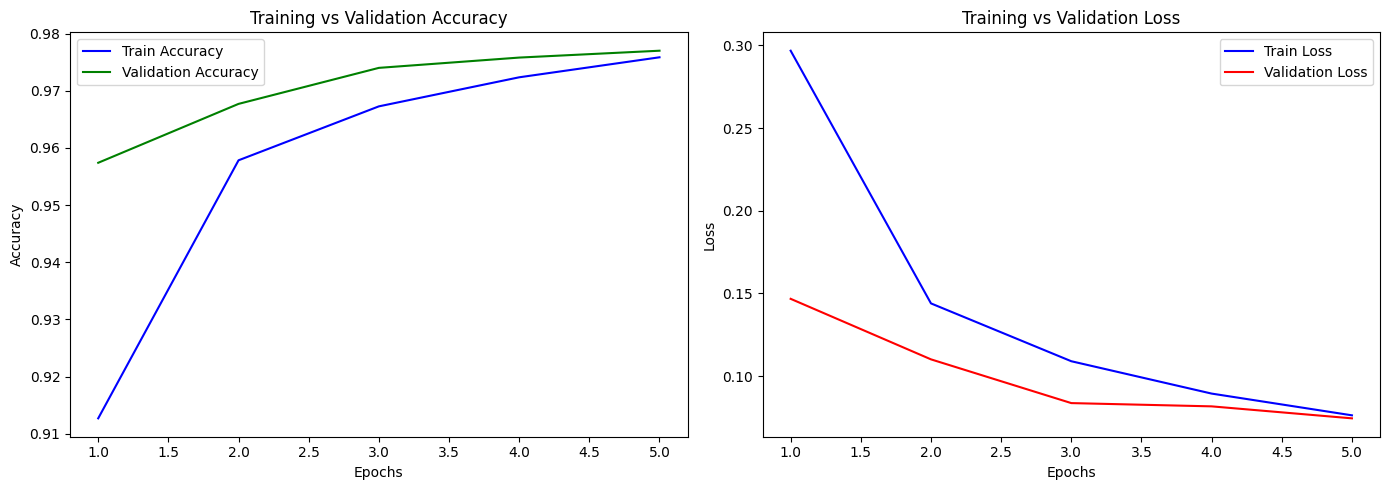

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Train Loss', c = "blue")
plt.plot(epochs, val_loss, 'g-', label='Validation Loss' , c="red")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
y_test[12]

np.uint8(9)

In [9]:
x_test[10].shape

(28, 28)

In [29]:
test_sample = x_test[12].reshape(1,28,28)

In [37]:
results = model.predict(test_sample)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[-12.047207 , -11.499282 ,  -7.5918407,  -1.8703086,   1.946665 ,
         -5.871874 , -14.209483 ,   0.8686225,  -4.0843287,  10.8538   ]],
      dtype=float32)

In [36]:
import numpy as np
predicted_class = np.argmax(results)
print("Predicted Class:", predicted_class)


Predicted Class: 9


In [40]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [41]:
probability_model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


array([[1.1327625e-10, 1.9592962e-10, 9.7516883e-09, 2.9778957e-06,
        1.3539422e-04, 5.4456777e-08, 1.3033908e-11, 4.6069388e-05,
        3.2536659e-07, 9.9981517e-01]], dtype=float32)